In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#!/bin/bash
!kaggle datasets download mahmoudshaheen1134/lemon-leaf-disease-dataset-lldd

Dataset URL: https://www.kaggle.com/datasets/mahmoudshaheen1134/lemon-leaf-disease-dataset-lldd
License(s): CC0-1.0


In [ ]:
import zipfile
import os # Import the os module

zip_ref = zipfile.ZipFile('/content/lemon-leaf-disease-dataset-lldd.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

extract_path = '/content/Original Dataset'  # Set extract_path to the actual extracted directory
print(os.listdir(extract_path)) # See the contents of the extracted folder

['Bacterial Blight', 'Curl Virus', 'Healthy Leaf', 'Dry Leaf', 'Deficiency Leaf', 'Spider Mites', 'Anthracnose', 'Sooty Mould', 'Citrus Canker']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# dataset folder reading
dataset_dir ='/content/Original Dataset/'

#initailizing batch and image dim
batch_size = 32
img_size = (224, 224)

full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True,
    seed=7
)

Found 1354 files belonging to 9 classes.


In [ ]:
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset = full_dataset.take(train_size)
val_dataset = full_dataset.skip(train_size).take(val_size)
test_dataset = full_dataset.skip(train_size + val_size).take(test_size)

print(f"Train batches: {len(train_dataset)}")
print(f"Validation batches: {len(val_dataset)}")
print(f"Test batches: {len(test_dataset)}")

Train batches: 34
Validation batches: 4
Test batches: 5


In [ ]:
Data_dir = "/kaggle/input/lemon-leaf-disease-dataset-lldd/Original Dataset"

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[:80]:
    layer.trainable = False
for layer in base_model.layers[80:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(full_dataset.class_names), activation='softmax')(x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,287,689 (16.36 MB)

 Trainable params: 2,120,713 (8.09 MB)

 Non-trainable params: 2,166,976 (8.27 MB)

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    batch_size=batch_size
)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 382ms/step - accuracy: 0.3972 - loss: 1.7497 - val_accuracy: 0.3516 - val_loss: 1.8585
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 486ms/step - accuracy: 0.8868 - loss: 0.4597 - val_accuracy: 0.3672 - val_loss: 1.8290
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 329ms/step - accuracy: 0.9567 - loss: 0.2309 - val_accuracy: 0.4844 - val_loss: 1.2988
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 310ms/step - accuracy: 0.9849 - loss: 0.1491 - val_accuracy: 0.7656 - val_loss: 0.6906
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - accuracy: 0.9959 - loss: 0.0904 - val_accuracy: 0.8672 - val_loss: 0.3663
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 486ms/step - accuracy: 0.9971 - loss: 0.0627 - val_accuracy: 0.8984 - val_loss: 0.2917
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 327ms/step - accuracy: 0.9986 - loss: 0.0502 - val_accuracy: 0.9453 - val_loss: 0.1994
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 460ms/step - accuracy: 0.9993 - loss: 0.0497 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 616ms/step - accuracy: 0.9945 - loss: 0.0195
Test accuracy: 0.9927536249160767


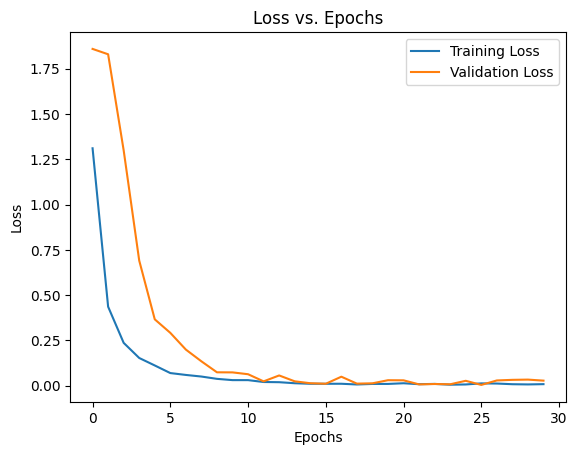

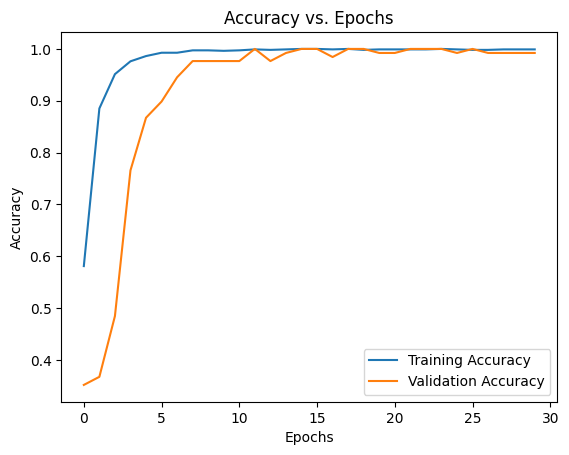

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


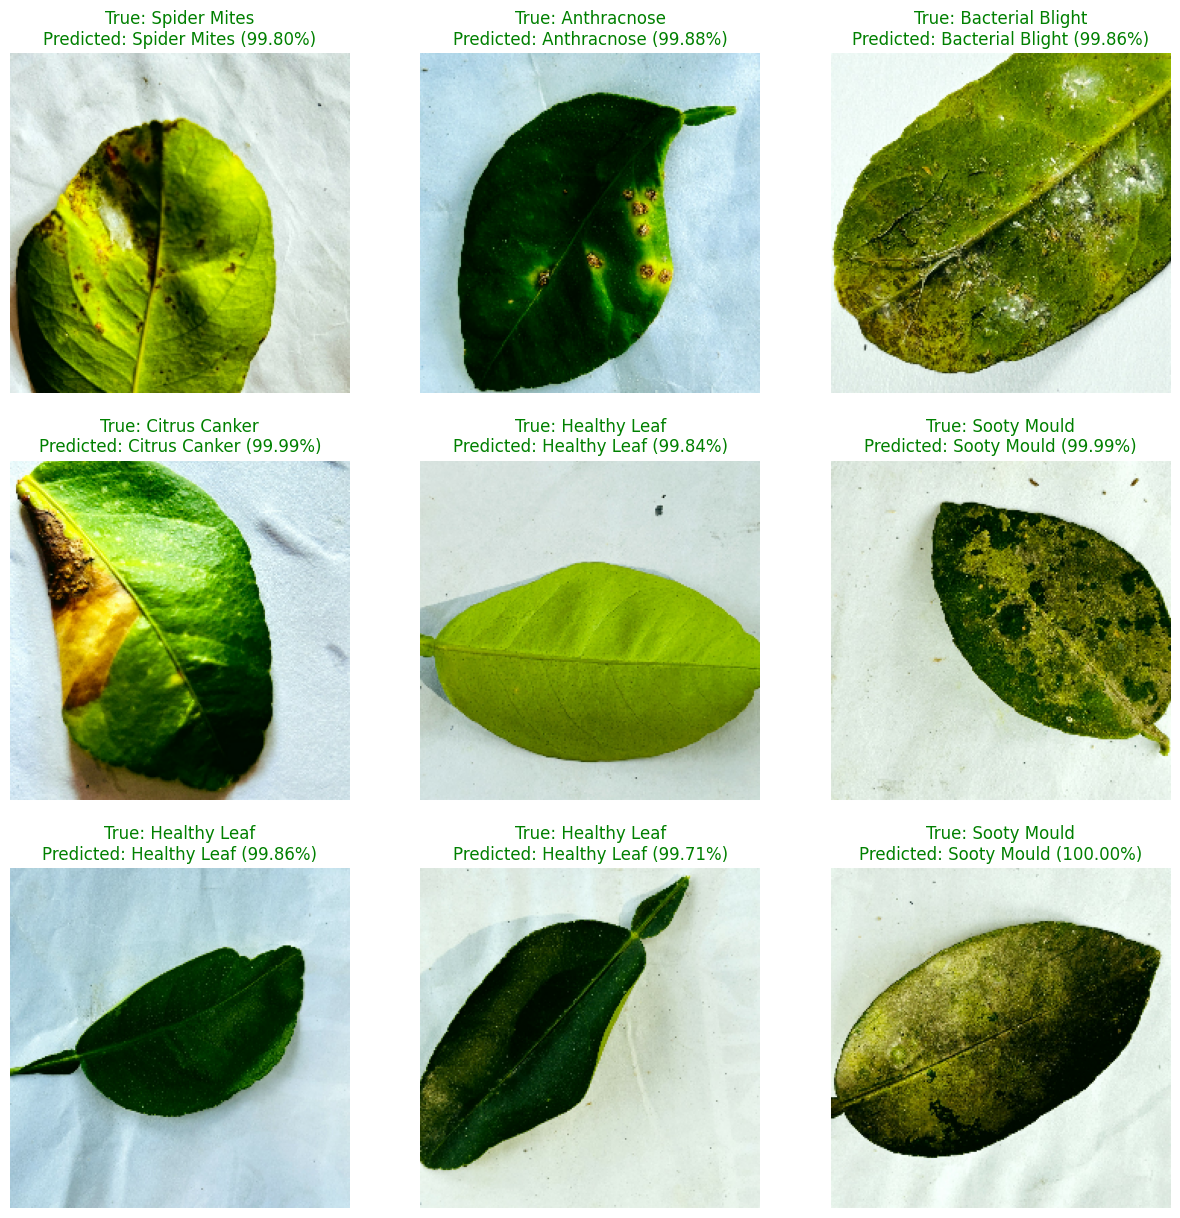

In [ ]:
from PIL import Image

# Get a batch of images and labels from the validation dataset
num_images_to_visualize = 9
image_batch, label_batch = next(iter(val_dataset.take(1)))
predicted_probabilities = model.predict(image_batch)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
true_labels = np.argmax(label_batch.numpy(), axis=1)
class_names = full_dataset.class_names

plt.figure(figsize=(15, 15))
for i in range(num_images_to_visualize):
    plt.subplot(3, 3, i + 1)
    img = image_batch[i].numpy().astype("uint8")
    plt.imshow(img)
    true_label = class_names[true_labels[i]]
    predicted_label = class_names[predicted_classes[i]]
    confidence = np.max(predicted_probabilities[i]) * 100
    title_color = "green" if true_label == predicted_label else "red"
    plt.title(f"True: {true_label}\nPredicted: {predicted_label} ({confidence:.2f}%)", color=title_color)
    plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


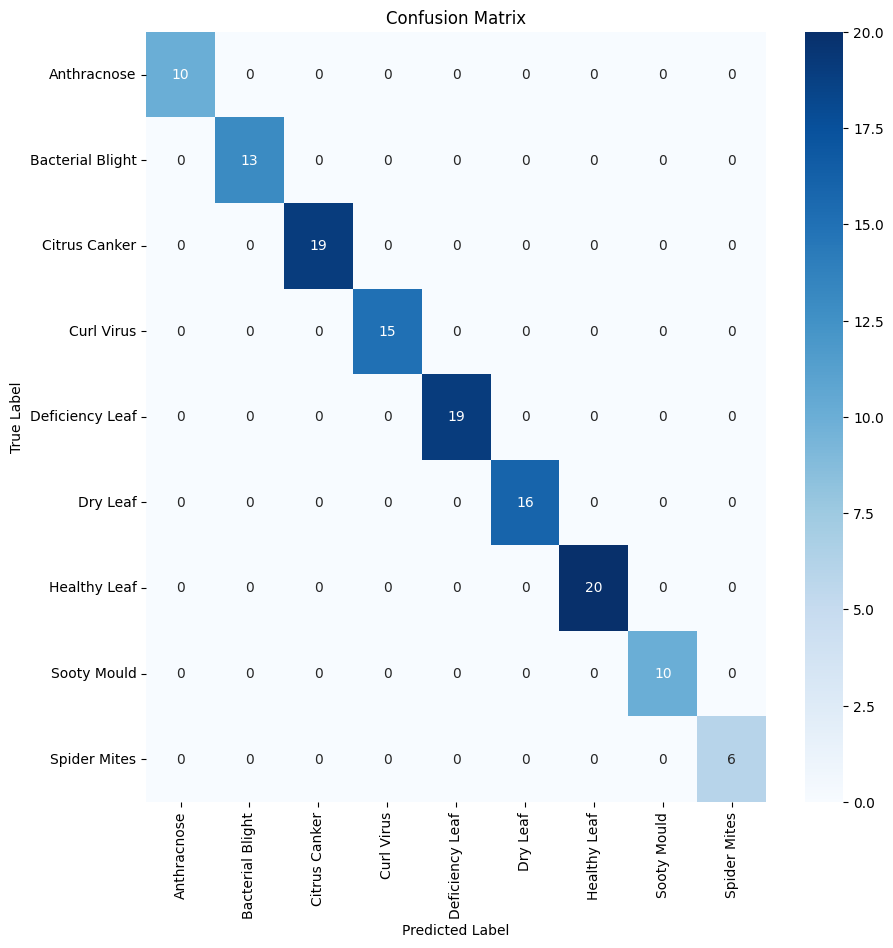


Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       1.00      1.00      1.00        10
Bacterial Blight       1.00      1.00      1.00        13
   Citrus Canker       1.00      1.00      1.00        19
      Curl Virus       1.00      1.00      1.00        15
 Deficiency Leaf       1.00      1.00      1.00        19
        Dry Leaf       1.00      1.00      1.00        16
    Healthy Leaf       1.00      1.00      1.00        20
     Sooty Mould       1.00      1.00      1.00        10
    Spider Mites       1.00      1.00      1.00         6

        accuracy                           1.00       128
       macro avg       1.00      1.00      1.00       128
    weighted avg       1.00      1.00      1.00       128



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Get the true labels and predictions for the validation dataset
true_labels = []
predictions = []

# Iterate through the validation dataset to get true labels
for images, labels in val_dataset:
    true_labels.extend(np.argmax(labels.numpy(), axis=1))
    # Get predictions from the model
    pred = model.predict(images)
    predictions.extend(np.argmax(pred, axis=1))

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predictions = np.array(predictions)

# Get the class names (assuming you have this from your dataset preparation)
class_names = full_dataset.class_names  # Replace with how you store your class names

# Create the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=class_names))

In [ ]:
from sklearn.metrics import classification_report

# Get the true labels and predictions for the validation dataset
true_labels = []
predictions = []

# Iterate through the validation dataset to get true labels and predictions
for images, labels in val_dataset:
    true_labels.extend(np.argmax(labels.numpy(), axis=1))
    pred = model.predict(images)
    predictions.extend(np.argmax(pred, axis=1))

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predictions = np.array(predictions)

# Get the class names (assuming you have this from your dataset preparation)
class_names = full_dataset.class_names  # Replace with how you store your class names

# Generate the classification report
report = classification_report(true_labels, predictions, target_names=class_names)

# Print the classification report
print("Classification Report:")
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       1.00      1.00      1.00         8
Bacterial Blight       1.00      1.00      1.00         8
   Citrus Canker       1.00      0.92      0.96        12
      Curl Virus       1.00      1.00      1.00        14
 Deficiency Leaf       0.94      1.00      0.97        15
        Dry Leaf       1.00      1.00      1.00        20
    Healthy Leaf       1.00      1.00      1.00        24
     Sooty Mould       1.00      1.00      1.00        15
    Spider Mites       1.00      1.00      1.00        12

        accuracy                           0.99       128
       macro avg       0.99      0.99      0.99       128
    weighted avg       0.99      0.99      0.99       128

